In [151]:
import numpy as np 
import string
import matplotlib.pyplot as plt

In [152]:
def graph(x=[chr(x) for x in range(97,123)], y=0):
    # Define Data
    # y = [x/2500 for x in count_letter]
    # Plot horizontal bar chart
    
    bars = plt.barh(x,y,height=.5)
    
    # To get data labels
    
    for  bar in bars:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(width, label_y, s=f'{width}')
        
    # Define axes labels
    
    plt.xlabel("No. of students")
    plt.ylabel("Grades of students")
    
    # Display a bar chart
        
    plt.show()

In [201]:
class Hangman(object):

    def __init__(self):
        full_dictionary_location = "dictionaries/words_250000_train.txt"
        self.full_dictionary = self. build_dictionary(full_dictionary_location)
        
        self.guessed_letters = np.zeros(26,dtype=bool)

        self.unigram = np.array(0)
        # self.unigram = 
        self.build_grams()

    def guess_letter(self,my_word):
        # return input()
        score = self.unigram
        for i in range(26):
            if(self.guessed_letters[i]):
                score[i] = 0
        # score = self.normalized_probability(my_word,score)

        guess_char = chr(score.argmax() + ord('a'))
        self.guessed_letters[score.argmax()] = True
        return guess_char
    # def probabilities(self,myword):
    #     prob = 
    def normalized_probability(self,my_word,score):
        sum = 0
        # score = np.zeros(26)
        for i in range(26):
            if self.guessed_letters[i]:
                score[i] = 0
            else:
                score[i] = self.unigram[i]
                sum = sum + score[i]

        score = score/sum
        return score

    def build_grams(self):
        self.unigram = np.zeros(26)
        
        for word in self.full_dictionary:
            unique_letters = np.zeros(26, dtype=bool) 
            for char in word:
                a = int(ord(char) - ord("a"))
                unique_letters[a] = True
            for i in range (26):
                if unique_letters[i]:
                    self.unigram[i] = self.unigram[i] + 1
        return self.unigram

    def game_play(self,actual_word, chance = 6):
        self.guessed_letters=np.zeros(26,dtype=bool)

        length = len(actual_word)
        my_word = ('_'*length)

        while chance:
            guess_char = self.guess_letter(my_word)
            correct_guess = False
            #check guess_char exist in actual_word, and if yes replace it in my_word
            for i in range (length):
                if(guess_char == actual_word[i]):
                    #replace ith char in my_word with guess_char
                    my_word = list(my_word)
                    my_word[i] = guess_char
                    my_word = ''.join(my_word)
                    correct_guess = True

            if(not correct_guess):
                chance = chance -1
                a = ord(guess_char)-ord("a")
                self.guessed_letters[a] = True
            
            if(not "_" in my_word):
                return 1
        return 0
    def build_dictionary(self, dictionary_file_location):
        text_file = open(dictionary_file_location,"r")
        full_dictionary = text_file.read().splitlines()
        text_file.close()
        return full_dictionary

In [202]:
api = Hangman()

In [203]:
api.unigram

array([133659.,  36789.,  75526.,  65225., 154827.,  23530.,  46878.,
        52006., 134627.,   3731.,  17594.,  97083.,  55506., 114976.,
       111416.,  57125.,   3903., 120548., 110214., 108416.,  67623.,
        20203.,  16813.,   6013.,  38705.,   8273.])

In [205]:
win = 0
win = win + api.game_play(actual_word="eat")
win

0

In [200]:
api.unigram

array([     0.,  36789.,  75526.,  65225.,      0.,  23530.,  46878.,
        52006.,      0.,   3731.,  17594.,  97083.,  55506.,      0.,
            0.,  57125.,   3903.,      0.,      0., 108416.,  67623.,
        20203.,  16813.,   6013.,  38705.,   8273.])

In [182]:
occurence_precent_of_char = api.unigram/2500
occurence_precent_of_char

# dict = {chr(i+ord("a")): occurence_precent_of_char[i] for i in range (26)}
# dict

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 1.4924, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    ])

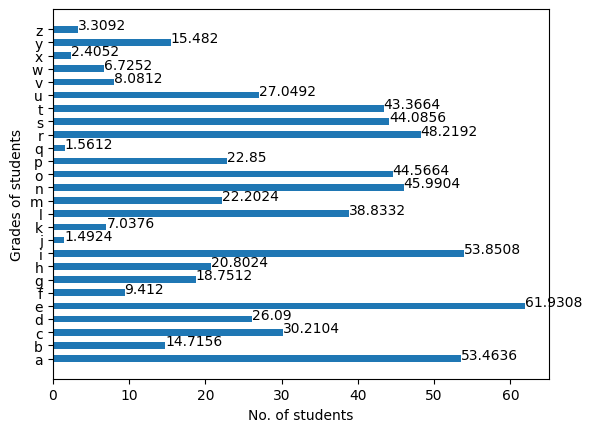

In [132]:
graph(y=occurence_precent_of_char)

In [23]:
win = 0
win = win + api.game_play(actual_word="words")

In [24]:
win

1